# lmfit

https://lmfit.github.io/lmfit-py/model.html

## Init

In [2]:
from numpy import exp, linspace, random
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from lmfit import Model
%matplotlib inline 
import mpld3
#mpld3.enable_notebook()

In [3]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('figure', figsize=(13, 8))  
plt.rc('lines', linewidth=2)  

## Function & Data

In [4]:
def gaussian(x, amp, cen, wid):
    return amp * exp(-(x-cen)**2 / wid)

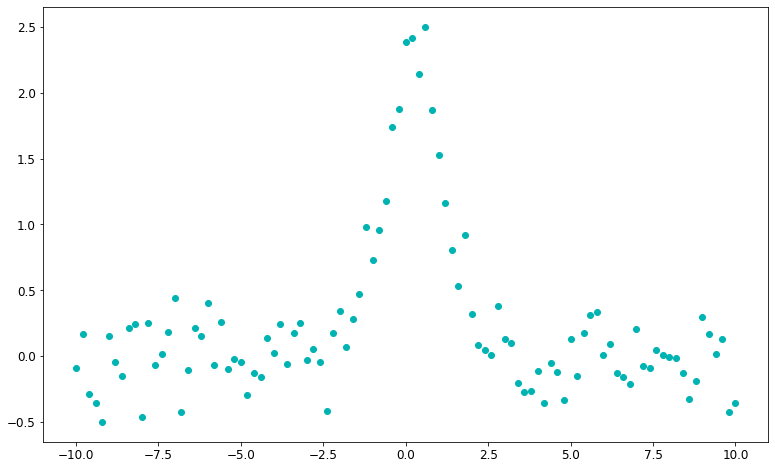

In [5]:
x = linspace(-10, 10, 101)
y = gaussian(x, 2.33, 0.21, 1.51) + random.normal(0, 0.2, x.size)

f, ax = plt.subplots(1, 1)
ax.plot(x, y, marker='o', linestyle='', color='#00b3b3', label='Data')

plt.show()

## curve_fit

lmfit is similar to curve_fit where it uses least squares and it also solves similar problem. However, it's more flexible, requires more work for simple fitting, and has different interface. Here's how it's done with curve_fit for example.

In [6]:
init_vals = [1, 0, 1]  # for [amp, cen, wid]
best_vals, covar = curve_fit(gaussian, x, y, p0=init_vals)
print('best_vals: {}'.format(best_vals))

best_vals: [2.32506205 0.25832542 1.49894424]


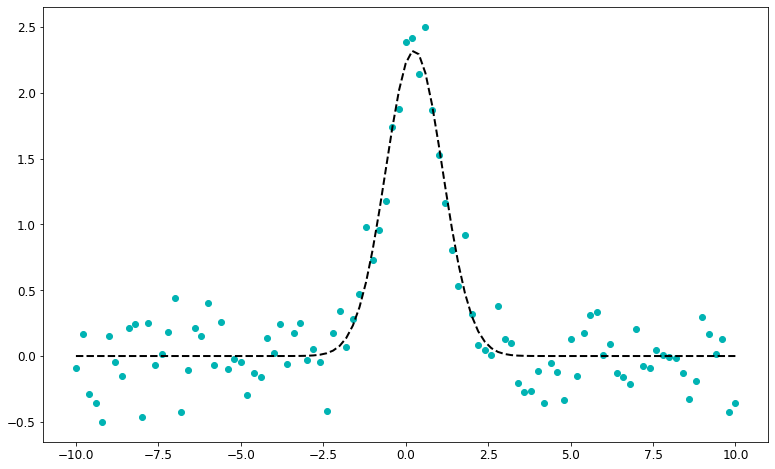

In [7]:
f, ax = plt.subplots(1, 1)
ax.plot(x, y, marker='o', linestyle='', color='#00b3b3', label='Data')
ax.plot(x, gaussian(x, *best_vals), linestyle='--', linewidth=2, color='black')

plt.show()

## lmfit

### Model

lmfit requires the function to be wrapped in a model.

In [8]:
gmodel = Model(gaussian)
gmodel

<lmfit.Model: Model(gaussian)>

In [9]:
print('parameter names: {}'.format(gmodel.param_names))
print('independent variables: {}'.format(gmodel.independent_vars))

parameter names: ['amp', 'cen', 'wid']
independent variables: ['x']


### params

You should make params

In [10]:
params = gmodel.make_params()
params

name,value,initial value,min,max,vary
amp,-inf,None,-inf,inf,True
cen,-inf,None,-inf,inf,True
wid,-inf,None,-inf,inf,True


You can set initial values right away when making params.

In [11]:
params = gmodel.make_params(cen=5, amp=200, wid=1)
params

name,value,initial value,min,max,vary
amp,200.000000,None,-inf,inf,True
cen,5.00000000,None,-inf,inf,True
wid,1.00000000,None,-inf,inf,True


### eval

You can have the model evaluate the given parameters. You can use the params object.

In [12]:
x_eval = linspace(0, 10, 201)
y_eval = gmodel.eval(params, x=x_eval)
y_eval[:5]

array([2.77758877e-09, 4.56803532e-09, 7.47514266e-09, 1.21713302e-08,
       1.97190112e-08])

Or specify the values with keyword args.

In [13]:
y_eval = gmodel.eval(x=x_eval, cen=5, amp=200, wid=1)
y_eval[:5]

array([2.77758877e-09, 4.56803532e-09, 7.47514266e-09, 1.21713302e-08,
       1.97190112e-08])

### fit

Fitting the model to data is rather simple.

In [14]:
params = gmodel.make_params(cen=1, amp=1, wid=2.0)
params

name,value,initial value,min,max,vary
amp,1.00000000,None,-inf,inf,True
cen,1.00000000,None,-inf,inf,True
wid,2.00000000,None,-inf,inf,True


In [15]:
result = gmodel.fit(y, params, x=x)
result

Or, like before, with keyword args.

In [16]:
result = gmodel.fit(y, x=x, cen=1, amp=1, wid=2.0)
result

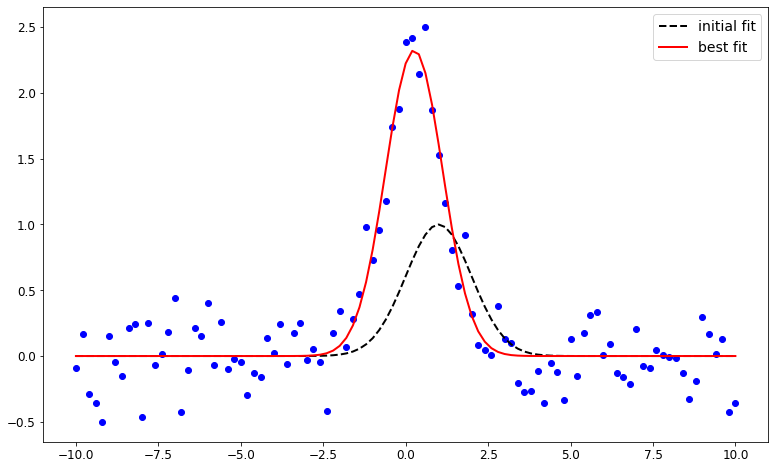

In [17]:
plt.plot(x, y, 'bo')
plt.plot(x, result.init_fit, 'k--', label='initial fit')
plt.plot(x, result.best_fit, 'r-', label='best fit')
plt.legend(loc='best')
plt.show()

## guess

lmfit can guess intial value for some built-in models. Not this one though

In [18]:
gmodel.guess(y)

NotImplementedError: guess() not implemented for Model

## set_param_hint

You can set initial, minimum, and maximum value for a parameter. You can also set if it can be varied or not. Parameters with vary=false will not be fitted. You can also set an expression to for it to guess. For example, if you want A to be always half of B, for A, expr="0.5*B".

In [46]:
gmodel.set_param_hint(
    name="cen",
    value=6.5,
    min=0.01,
    max=10,
    vary=True
)
gmodel.set_param_hint(
    name="amp",
    value=10,
    expr="min(5, cen)",
    vary=False
)
gmodel.set_param_hint(
    name="wid",
    value=2.0,
    min=0.01,
    max=10,
    vary=True
)
gmodel.print_param_hints()

Name     Value      Min      Max     Vary    Expr    
amp        10     -inf      inf    False    min(5, cen)
cen       6.5     0.01       10     True    
wid         2     0.01       10     True    


In [47]:
params = gmodel.make_params()
params

name,value,initial value,min,max,vary,expression
amp,5.00000000,None,-inf,inf,False,"min(5, cen)"
cen,6.50000000,None,0.01000000,10.0000000,True,
wid,2.00000000,None,0.01000000,10.0000000,True,


Sometimes params from make_params is not updating after you set hints. Weird.

In [48]:
result = gmodel.fit(y, params, x=x)
result

What the heck.

## result

### Params

In [49]:
result.params

name,value,standard error,relative error,initial value,min,max,vary,expression
amp,5.00000000,0.00000000,(0.00%),5,-inf,inf,False,"min(5, cen)"
cen,6.49968220,0.01419311,(0.22%),6.5,0.01000000,10.0000000,True,
wid,0.01000000,0.00199165,(19.92%),2.0,0.01000000,10.0000000,True,


### Confident Interval

Calculate the confidence intervals for the variable parameters. Idk why it's like this, what this means, or how to use this.

In [50]:
result.conf_interval()

C:\ProgramData\Anaconda3\lib\site-packages\lmfit\confidence.py:312: UserWarning: Bound reached with prob(wid=0.01) = 0.0 < max(sigmas)
  warn(errmsg)


OrderedDict([('cen',
              [(0.9973002039367398, 6.462954425064052),
               (0.9544997361036416, 6.476125333124138),
               (0.6826894921370859, 6.488152651473206),
               (0.0, 6.4996821959162325),
               (0.6826894921370859, 6.511204002836841),
               (0.9544997361036416, 6.523205692886111),
               (0.9973002039367398, 6.5363217821676685)]),
             ('wid',
              [(0.9973002039367398, -inf),
               (0.9544997361036416, -inf),
               (0.6826894921370859, -inf),
               (0.0, 0.010000000196596899),
               (0.6826894921370859, 0.010378032895298369),
               (0.9544997361036416, 0.011550797436547446),
               (0.9973002039367398, 0.013689903886010348)])])

In [51]:
print(result.ci_report())

        99.73%    95.45%    68.27%    _BEST_    68.27%    95.45%    99.73%
 cen:  -0.03673  -0.02356  -0.01153   6.49968  +0.01152  +0.02352  +0.03664
 wid:      -inf      -inf      -inf   0.01000  +0.00038  +0.00155  +0.00369


### eval_uncertainty

Evaluate the uncertainty of the model function.

This can be used to give confidence bands for the model from the uncertainties in the best-fit parameters.

The value of sigma is number of sigma values, and is converted to a probability. Values of 1, 2, or 3 give probabilities of 0.6827, 0.9545, and 0.9973, respectively. If the sigma value is < 1, it is interpreted as the probability itself. That is, sigma=1 and sigma=0.6827 will give the same results, within precision errors.

In [52]:
result.eval_uncertainty(sigma=0.9545)[:5]

array([0., 0., 0., 0., 0.])

In [53]:
len(result.eval_uncertainty()) == len(x)

True

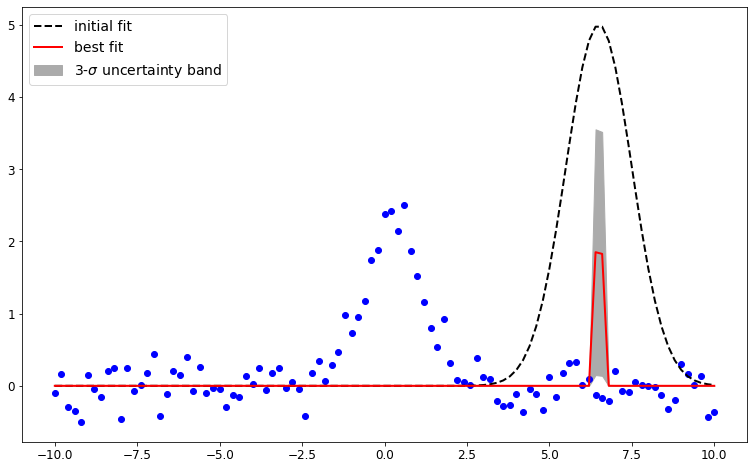

In [54]:
dely = result.eval_uncertainty(sigma=3)
plt.plot(x, y, 'bo')
plt.plot(x, result.init_fit, 'k--', label='initial fit')
plt.plot(x, result.best_fit, 'r-', label='best fit')
plt.fill_between(x, result.best_fit-dely, result.best_fit+dely, color="#ABABAB", label='3-$\sigma$ uncertainty band')
plt.legend(loc='best')
plt.show()

### plot

(<Figure size 936x936 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

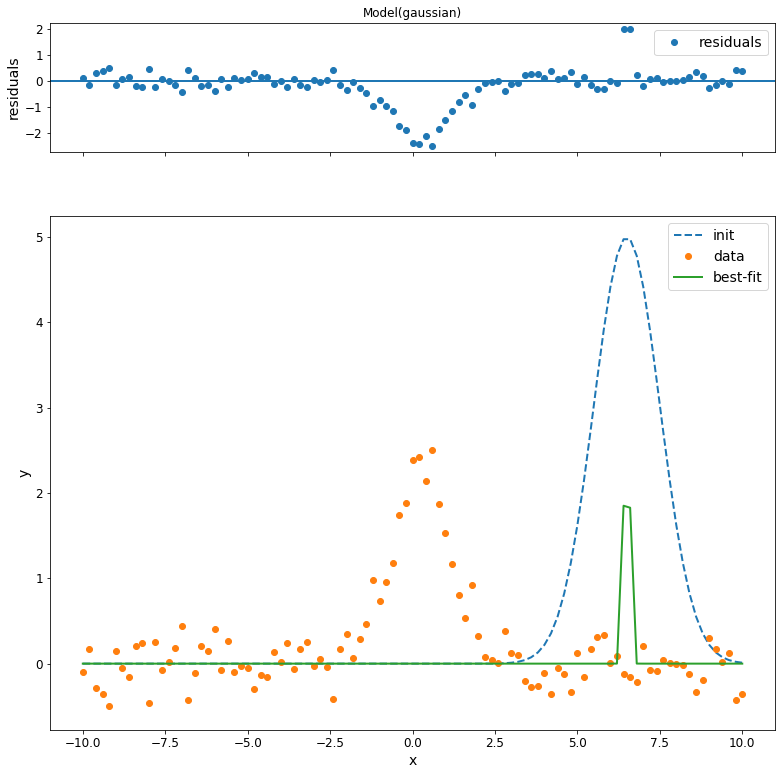

In [55]:
result.plot(show_init=True)

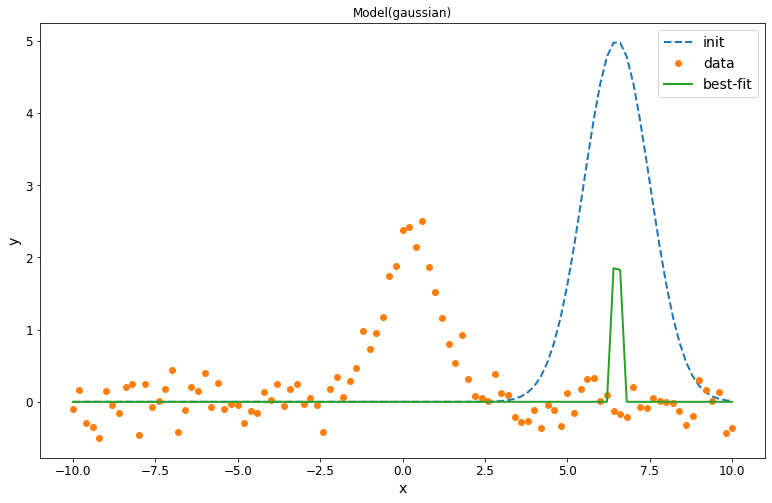

In [56]:
result.plot_fit(show_init=True)
plt.show()

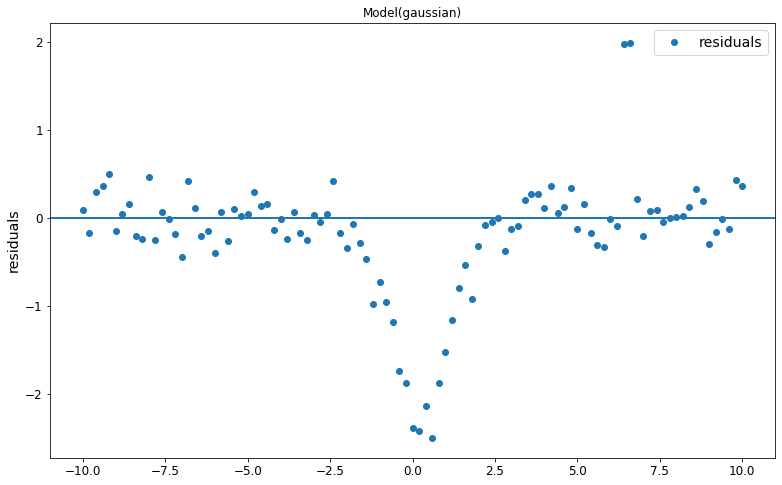

In [57]:
result.plot_residuals()
plt.show()

### best_values

Parameter values for best fit

In [58]:
result.best_values

{'amp': 5, 'cen': 6.4996821959162325, 'wid': 0.010000000196596899}

### best_fit

y value of the best fit

In [59]:
result.best_fit

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0

In [60]:
len(result.best_fit) == len(x)

True

### covar

Covarience, used to calculate stdev. Just like 2nd output of curve_fit

In [61]:
result.covar

array([[ 2.01444311e-04, -8.97800756e-08],
       [-8.97800756e-08,  3.96668493e-06]])

### redchi

Floating point reduced chi-square statistic (see MinimizerResult – the optimization result).

In [62]:
result.redchi

0.5452400166778659

### residual

residual values of the best fit and data

In [63]:
result.residual

array([ 0.09283489, -0.16933925,  0.29020454,  0.35566628,  0.50175278,
       -0.15156929,  0.04664475,  0.15304704, -0.21010909, -0.24339652,
        0.46311211, -0.25248439,  0.06919613, -0.01652172, -0.18092599,
       -0.44250701,  0.4228574 ,  0.10711399, -0.21208543, -0.14849246,
       -0.40543499,  0.06885043, -0.26099199,  0.10152311,  0.02353235,
        0.04726331,  0.29443574,  0.13273096,  0.15736567, -0.13822475,
       -0.01940278, -0.24592795,  0.05980959, -0.17671434, -0.24916609,
        0.02669006, -0.04981235,  0.04428447,  0.41576614, -0.17436145,
       -0.34432436, -0.06569087, -0.28465481, -0.46992149, -0.983571  ,
       -0.72951957, -0.95998966, -1.17921483, -1.74299481, -1.8780791 ,
       -2.38600509, -2.42030938, -2.14449246, -2.50364197, -1.87361346,
       -1.52667426, -1.16476647, -0.80391969, -0.5338521 , -0.91897924,
       -0.31944172, -0.08329738, -0.04629443, -0.00511341, -0.38166435,
       -0.12788374, -0.09632101,  0.20642583,  0.27524443,  0.26

In [64]:
len(result.residual) == len(x)

True

## Composite Model

With lmfit, you can make composite model simply. For example, I want to make line+gaussian.

In [65]:
def gaussian_plus_line(x, amp, cen, wid, slope, intercept):
    """line + 1-d gaussian"""

    gauss = amp * exp(-(x-cen)**2 / wid)
    line = slope*x + intercept
    return gauss + line

In [66]:
mod = Model(gaussian_plus_line)
print('parameter names: {}'.format(mod.param_names))
print('independent variables: {}'.format(mod.independent_vars))

parameter names: ['amp', 'cen', 'wid', 'slope', 'intercept']
independent variables: ['x']


But we can also make the line model, and combine the models.

In [67]:
def line(x, slope, intercept):
    """a line"""
    return slope*x + intercept

In [68]:
mod = Model(gaussian) + Model(line)
print('parameter names: {}'.format(mod.param_names))
print('independent variables: {}'.format(mod.independent_vars))

parameter names: ['amp', 'cen', 'wid', 'slope', 'intercept']
independent variables: ['x']


[[Model]]
    (Model(gaussian) + Model(line))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 43
    # data points      = 101
    # variables        = 5
    chi-square         = 4.21128307
    reduced chi-square = 0.04386753
    Akaike info crit   = -310.912668
    Bayesian info crit = -297.837065
[[Variables]]
    amp:        2.30097805 +/- 0.09701286 (4.22%) (init = 1)
    cen:        0.22857476 +/- 0.03909343 (17.10%) (init = 1)
    wid:        1.32142182 +/- 0.13238781 (10.02%) (init = 1)
    slope:      0.99856099 +/- 0.00358484 (0.36%) (init = 0)
    intercept:  1.02877625 +/- 0.02350766 (2.29%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(amp, wid)       = -0.495
    C(wid, intercept) = -0.289
    C(amp, intercept) = -0.171


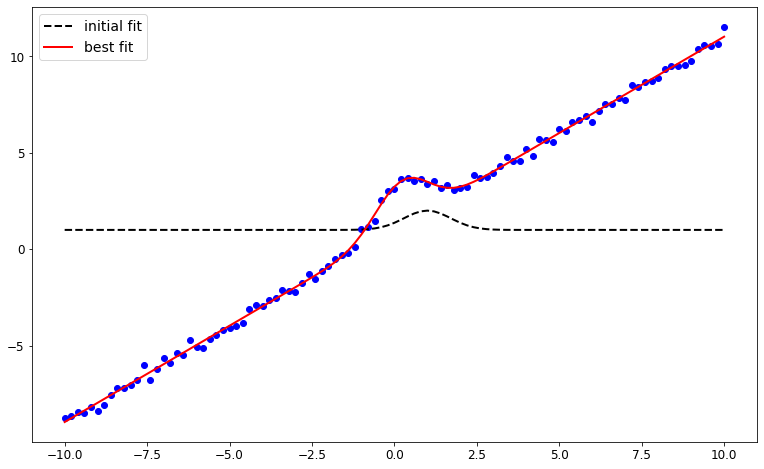

In [69]:
y2 = gaussian_plus_line(x, 2.33, 0.21, 1.51, 1, 1) + random.normal(0, 0.2, x.size)
pars = mod.make_params(amp=1, cen=1, wid=1, slope=0, intercept=1)

result = mod.fit(y2, pars, x=x)

print(result.fit_report())

plt.plot(x, y2, 'bo')
plt.plot(x, result.init_fit, 'k--', label='initial fit')
plt.plot(x, result.best_fit, 'r-', label='best fit')
plt.legend(loc='best')
plt.show()

Individual component models of the composite model can be accessed through eval_components.

In [70]:
comps = result.eval_components()
comps

OrderedDict([('gaussian',
              array([9.47526160e-35, 2.03292736e-33, 4.10544232e-32, 7.80378852e-31,
                     1.39623484e-29, 2.35135875e-28, 3.72723487e-27, 5.56111747e-26,
                     7.80988826e-25, 1.03236914e-23, 1.28449569e-22, 1.50431135e-21,
                     1.65825095e-20, 1.72056158e-19, 1.68034180e-18, 1.54465851e-17,
                     1.33651789e-16, 1.08849018e-15, 8.34414218e-15, 6.02069073e-14,
                     4.08901200e-13, 2.61395372e-12, 1.57284109e-11, 8.90798017e-11,
                     4.74876939e-10, 2.38281519e-09, 1.12540045e-08, 5.00300862e-08,
                     2.09345129e-07, 8.24521364e-07, 3.05666897e-06, 1.06660188e-05,
                     3.50319029e-05, 1.08301021e-04, 3.15143838e-04, 8.63162430e-04,
                     2.22527496e-03, 5.39985723e-03, 1.23335562e-02, 2.65156207e-02,
                     5.36565472e-02, 1.02200046e-01, 1.83225915e-01, 3.09193356e-01,
                     4.91112342e-01, 7.

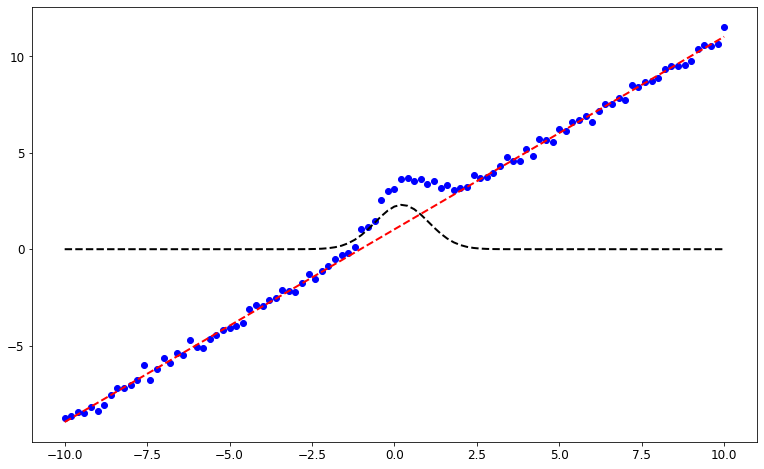

In [71]:
plt.plot(x, y2, 'bo')
plt.plot(x, comps['gaussian'], 'k--', label='Gaussian component')
plt.plot(x, comps['line'], 'r--', label='Line component')
plt.show()

Composite Model was created automatically when using arithmetic operator. It actually supports any binary operator. To use a binary operator other than ‘+’, ‘-‘, ‘*’, or ‘/’ you can explicitly create a CompositeModel with the appropriate binary operator. You can also make a custom binary operator function (f(a, b)).